# Gene Annotation

Mapping of the relevant CpGs identified by clustering and the associated genes.
The CpGs can be found in folder 'Mammal_Methylation_Levels/Cluster Analysis/Relevant CpGS'. There will be at least 3 files, each with the relevant CpGs of each of the 3 Clocks. 

In [1]:
### Libraries

import os

from Bio import Entrez, SeqIO
from Bio.SeqFeature import SeqFeature, FeatureLocation
from Bio.SeqRecord import SeqRecord

import pandas as pd

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd


In [2]:
### Load the Clocks metadata - [Combined]
# this was needed because ENTREZID was needed for downstream analysis


# Original file names
ori_clock_name = ['clock_1_ordered.csv', 'clock_2_ordered.csv', 'clock_3_ordered.csv', 'overlap_2_3_ordered.csv']

# Mapping of original file names to desired clock names
clock_name_mapping = {
    'clock_1_ordered.csv': 'clock1',
    'clock_2_ordered.csv': 'clock2',
    'clock_3_ordered.csv': 'clock3',
    'overlap_2_3_ordered.csv': 'clock2_3'
}

# List to store dataframes
df_list = []

# Load the CSV files into the dictionary with the desired names
for clock_name in ori_clock_name:
    new_name = clock_name_mapping[clock_name]
    df = pd.read_csv(f'../../FunctionalAnalysis/{clock_name}')
    df.rename(columns={'var': 'CpG'}, inplace=True)  # Rename 'var' column to 'CpG'

    # For clock2_3, rename 'var_x' to 'CpG' and 'ENTREZID_x' to 'ENTREZID'
    if new_name == 'clock2_3':
        df.rename(columns={'var_x': 'CpG', 'ENTREZID_x': 'ENTREZID'}, inplace=True)
    
    df_list.append(df)

# Concatenate all dataframes
combined_clocks_df = pd.concat(df_list, ignore_index=True)

# Drop duplicates based on 'CpG' and 'ENTREZID' columns
combined_clocks_df.drop_duplicates(subset=['CpG', 'ENTREZID'], inplace=True)

# Reset index
combined_clocks_df.reset_index(drop=True, inplace=True)

# Display the combined dataframe
combined_clocks_df.head()


,index,CpG,beta_clock1,CHR,bp_hg38,Gene,Gene.hg19,ENTREZID,conservationInMouse,GeneRegionID,...,CHR_y,bp_hg38_y,Gene.hg19_y,ENTREZID_y,conservationInMouse_y,GeneRegionID_y,annotation_y,CHR_mm10_y,bp_mm10_y,Gene_mm10_y
0,143.0,cg11728741,0.928874,8,41896469.0,ANK1,ANK1,286,conserved gene and region in mouse and human,ANK1_Exon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,297.0,cg24352905,0.853268,5,77645452.0,OTP,OTP,23440,conserved gene and region in mouse and human,OTP_Promoter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,98.0,cg08938156,0.843749,3,147409417.0,LOC440982,ZIC1,440982,mapped to different gene in human and mouse,LOC440982_fiveUTR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,160.0,cg13058338,0.638660,12,54173598.0,SMUG1,SMUG1,23583,mapped to different gene in human and mouse,SMUG1_Intron,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,316.0,cg26067250,0.510613,2,172085721.0,DLX1,DLX1,1745,mapped to different gene in human and mouse,DLX1_Exon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
### Load the csv with the relevant CpGs for each of the crosstissue methylation 

# List of clock names
dataset_names = ['all_clocks_high_methylated_cpgs',
                    'all_clocks_low_methylated_cpgs',
                    'all_clocks_variable_methylated_cpgs', 
                    'anova_all_clocks_significant_cpgs',]

# Dictionary to store the dataframes for each dataset
rel_cpgs_dict = {}

# Loop through each clock name
for dataset in dataset_names:
    # Read the CSV file for the relevant CpGs
    file_path = f'../../Mammal_Methylation_Levels/Cross-Tissue Methylation Patterns/{dataset}.csv'
    df = pd.read_csv(file_path)
    
    # Store the dataframe in the dictionary
    rel_cpgs_dict[dataset] = df
    
    # Print the number of CpGs for the current clock
    print(f'{dataset} has {len(df)} CpGs')


all_clocks_high_methylated_cpgs has 17 CpGs
all_clocks_low_methylated_cpgs has 42 CpGs
all_clocks_variable_methylated_cpgs has 81 CpGs
anova_all_clocks_significant_cpgs has 17 CpGs


In [5]:
rel_cpgs_dict['all_clocks_high_methylated_cpgs'].head()

,CpG
0,cg14443903
1,cg05401971
2,cg21907062
3,cg23778391
4,cg17516812


In [6]:
### Load the HorvathMammalMethylChip40 annotation file

annotation_file = "HorvathMammalMethylChip40.csv"
annotations = pd.read_csv(annotation_file, index_col=0, low_memory=False)
annotations.head()

,IlmnID,Name,AddressA_ID,AlleleA_ProbeSeq,ProbeA_Ref_CIGAR,AddressB_ID,AlleleB_ProbeSeq,ProbeB_Ref_CIGAR,StrandFR,StrandTB,...,Elephant.loxAfr3.100_CGstart,Elephant.loxAfr3.100_CGend,Elephant.loxAfr3.100_seqnames,Elephant.loxAfr3.100_SYMBOL,Elephant.loxAfr3.100_main_Categories,Cattle.ARS-UCD1.2_CGstart,Cattle.ARS-UCD1.2_CGend,Cattle.ARS-UCD1.2_seqnames,Cattle.ARS-UCD1.2_SYMBOL,Cattle.ARS-UCD1.2_main_Categories
1,cg00000165,cg00000165_B_C_II_16W28R4_Y,61688267,CAAAATCTATTAATACWATAACTTTTAATAAAACAACTAAAACACR...,16W28R4,NaN,NaN,NaN,R,B,...,11412983.0,11412984.0,scaffold_60,BARHL2,Intergenic_upstream,52520158.0,52520159.0,3,BARHL2,Intergenic_upstream
2,cg00001209,cg00001209_B_C_II_15M34_Y,99653471,TCTTAACATTATAAAMAAAACAAAATAATACAAAATATATTCAACC...,15M34,NaN,NaN,NaN,F,B,...,64819638.0,64819639.0,scaffold_7,KIF2A,Intergenic_upstream,17450440.0,17450441.0,20,KIF2A,Intergenic_upstream
3,cg00001364,cg00001364_B_C_II_28Y21_Y,94653210,ACCAATTTAATATAAATCRCTTATATAAYAAACACCTAAAAACAAA...,28Y21,NaN,NaN,NaN,R,B,...,1266053.0,1266054.0,scaffold_74,PROX1,Exon,69576644.0,69576645.0,16,PROX1,Exon
4,cg00001582,cg00001582_B_C_II_17M32_Y,88781221,AACCCTTTAAAAATAAAMTAACCAATATAATCTAACACTTCAACTT...,17M32,NaN,NaN,NaN,R,B,...,NaN,NaN,NaN,NaN,NaN,34702943.0,34702944.0,28,ZMIZ1,Intergenic_upstream
5,cg00002920,cg00002920_B_C_II_M40Y5Y2_Y,03643387,MCATAATTTATTTTCTTAAAATATTAATTTATCAACAACTTYCCTA...,M40Y5Y2,NaN,NaN,NaN,R,B,...,NaN,NaN,NaN,NaN,NaN,47915351.0,47915352.0,26,MKI67,Intergenic_upstream


In [7]:
### Display all column names to see what we have
print(annotations.columns)

Index(['IlmnID', 'Name', 'AddressA_ID', 'AlleleA_ProbeSeq', 'ProbeA_Ref_CIGAR',
       'AddressB_ID', 'AlleleB_ProbeSeq', 'ProbeB_Ref_CIGAR', 'StrandFR',
       'StrandTB', 'StrandCO', 'Design_Sequence', 'Forward_Sequence',
       'Top_Sequence', 'SourceSeq', 'Infinium_Design_Type', 'Next_Base',
       'Color_Channel', 'Next_Base_Alt', 'Color_Channel_Alt', 'CG.',
       'SNP_Count', 'CPG_Count', 'Replicate_Number', 'Replicate_Count',
       'IlmnID_Old', 'Human.Hg19_CGstart', 'Human.Hg19_CGend',
       'Human.Hg19_seqnames', 'Human.Hg19_SYMBOL',
       'Human.Hg19_main_Categories', 'Human.Hg38_start', 'Human.Hg38_end',
       'Human.Hg38_seqnames', 'Human.Hg38_SYMBOL',
       'Human.Hg38_main_Categories', 'Mouse.GRCm38.100_CGstart',
       'Mouse.GRCm38.100_CGend', 'Mouse.GRCm38.100_seqnames',
       'Mouse.GRCm38.100_SYMBOL', 'Mouse.GRCm38.100_main_Categories',
       'Rat.Rnor.6.0.101_CGstart', 'Rat.Rnor.6.0.101_CGend',
       'Rat.Rnor.6.0.101_seqnames', 'Rat.Rnor.6.0.101_SYMBOL',
 

The annotations csv contains the gene annotations for all the species used in the analysis. For now, we will focus on human CpGs and genes.

In [8]:
### Selecting relevant human annotation columns

annotation_cols = [
    'IlmnID', 
    'Human.Hg38_seqnames', 
    'Human.Hg38_start', 
    'Human.Hg38_end', 
    'Human.Hg38_SYMBOL', 
    'Human.Hg38_main_Categories'
]

# Filter the annotation DataFrame to include only the necessary columns
filtered_annotations = annotations.copy()[annotation_cols]
filtered_annotations.head()

# Rename columns for easier understanding and to match desired output
filtered_annotations.rename(columns={
    'IlmnID': 'CpG',
    'Human.Hg38_seqnames': 'chr',
    'Human.Hg38_start': 'start',
    'Human.Hg38_end': 'end',
    'Human.Hg38_SYMBOL': 'gene',
    'Human.Hg38_main_Categories': 'category'
}, inplace=True)
filtered_annotations.head()

# Merge CpG names with annotations to get genomic coordinates and gene information
## load and add to the df in the dictionary
rel_cpgs_dict['all_clocks_high_methylated_cpgs'] = pd.merge(rel_cpgs_dict['all_clocks_high_methylated_cpgs'], filtered_annotations, on='CpG', how='left')
rel_cpgs_dict['all_clocks_low_methylated_cpgs'] = pd.merge(rel_cpgs_dict['all_clocks_low_methylated_cpgs'], filtered_annotations, on='CpG', how='left')
rel_cpgs_dict['all_clocks_variable_methylated_cpgs'] = pd.merge(rel_cpgs_dict['all_clocks_variable_methylated_cpgs'], filtered_annotations, on='CpG', how='left')
rel_cpgs_dict['anova_all_clocks_significant_cpgs'] = pd.merge(rel_cpgs_dict['anova_all_clocks_significant_cpgs'], filtered_annotations, on='CpG', how='left')


In [9]:
### Function to determine region type

def determine_region_type(category):
    
    if pd.isna(category):
        return 'intergenic'
    
    category = category.lower()  # Convert to lowercase for case-insensitive matching
    
    if 'promoter' in category:
        return 'promoter'
    
    elif any(term in category for term in ['exon', 'intron', 'utr']): # Because some categories contain 'exon', 'intron', 'utr'
        return 'gene body'
    
    elif 'intergenic' in category:
        return 'intergenic'
    
    else:
        return 'other'  # For any unforeseen categories

In [10]:
### Annotation Loop

for dataset_name, df in rel_cpgs_dict.items():

    # Determine the region type for each CpG and add it to the DataFrame
    df['region'] = df['category'].apply(determine_region_type)

    # Add ENTREZID column to the DataFrame
    df = pd.merge(df, combined_clocks_df[['CpG', 'ENTREZID']], on='CpG', how='left')

    # update the dictionary
    rel_cpgs_dict[dataset_name] = df

    output_path = f'../../FunctionalAnalysis/Annotations/Annotations Results/Cross-Tissue Methylation/{dataset_name}_annotated_relevant_CpGs.csv'
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    
    df.to_csv(output_path, index=False)

In [11]:
rel_cpgs_dict['all_clocks_high_methylated_cpgs'].head()

,CpG,chr,start,end,gene,category,region,ENTREZID
0,cg14443903,chr19,30718448.0,30718449.0,ZNF536,Intergenic_downstream,intergenic,9745
1,cg05401971,chr11,67250713.0,67250714.0,KDM2A,Exon,gene body,22992
2,cg21907062,chr2,174081061.0,174081062.0,OLA1,Exon,gene body,29789
3,cg23778391,chr1,10698402.0,10698403.0,CASZ1,Intron,gene body,54897
4,cg17516812,chr9,16773158.0,16773159.0,BNC2,Intron,gene body,54796


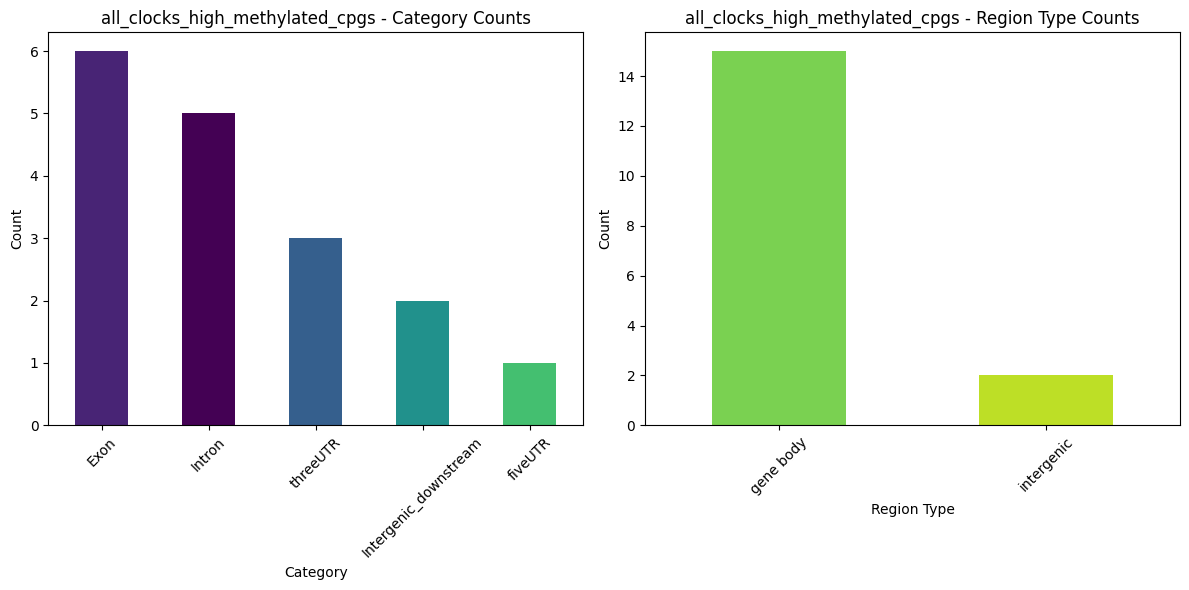

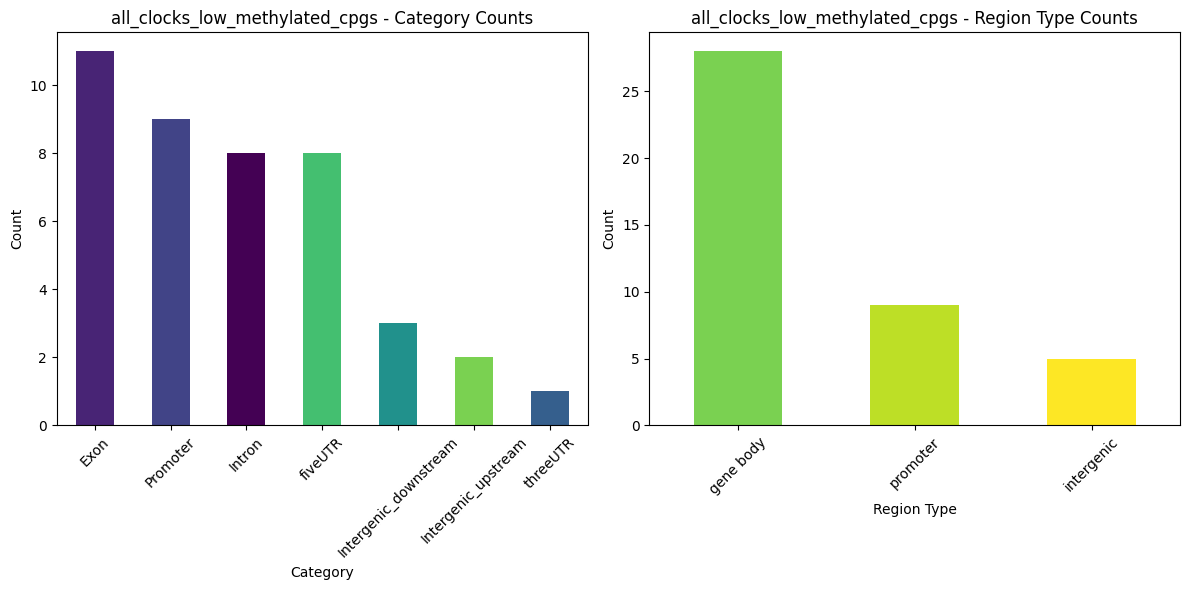

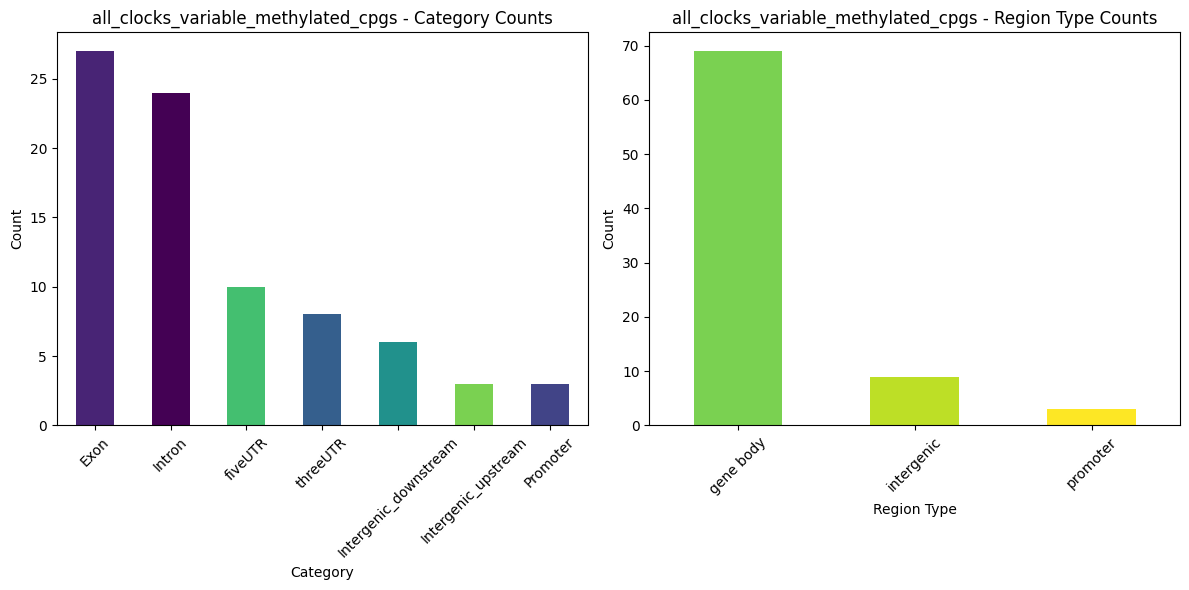

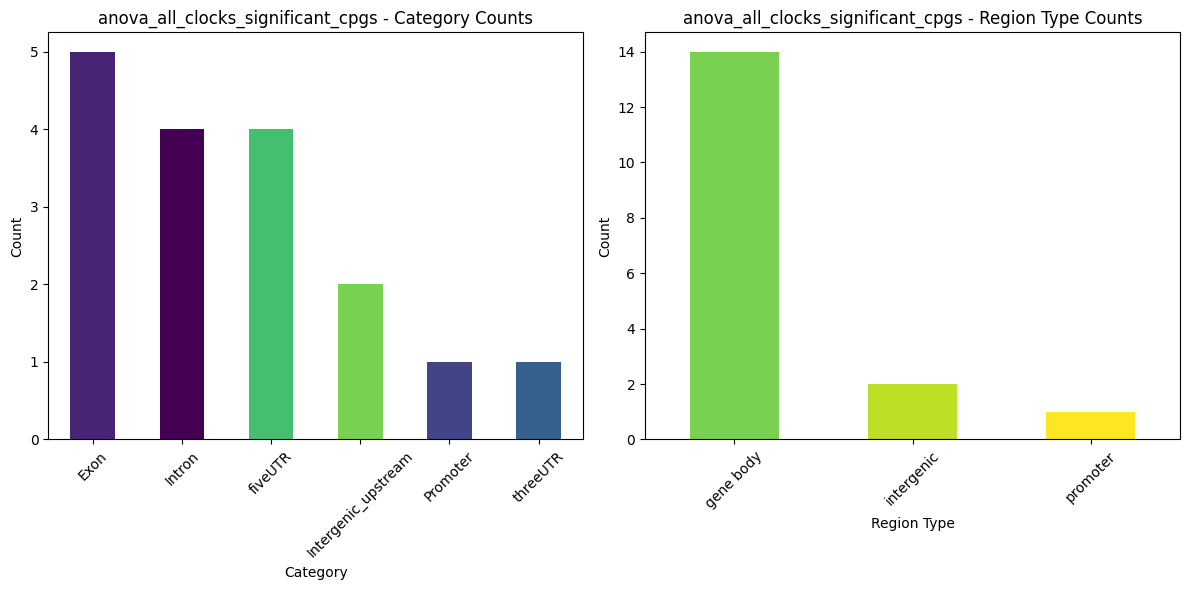

In [12]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

# Sample Viridis color palette at various positions
viridis_colors = plt.cm.viridis([0, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 1.0])

# Map the categories to specific Viridis colors
color_map = {
    'Exon': mcolors.to_hex(viridis_colors[1]),
    'Intron': mcolors.to_hex(viridis_colors[0]),
    'Promoter': mcolors.to_hex(viridis_colors[2]),
    'threeUTR': mcolors.to_hex(viridis_colors[3]),
    'fiveUTR': mcolors.to_hex(viridis_colors[5]),
    'Intergenic_downstream': mcolors.to_hex(viridis_colors[4]),
    'Intergenic_upstream': mcolors.to_hex(viridis_colors[6])
}

# Loop through each clock dataframe in the dictionary
for clock_name, cpg_annotations in rel_cpgs_dict.items():
    # Create subplots
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Plot category counts with predefined colors
    category_counts = cpg_annotations['category'].value_counts()
    category_colors = [color_map[cat] for cat in category_counts.index]
    category_counts.plot(kind='bar', ax=ax[0], color=category_colors)
    ax[0].set_title(f'{clock_name} - Category Counts')
    ax[0].set_xlabel('Category')
    ax[0].set_ylabel('Count')
    ax[0].xaxis.set_tick_params(rotation=45)

    # Plot region type counts with colors from the end of the Viridis spectrum
    viridis_end_colors = plt.cm.viridis([0.8, 0.9, 1.0])
    region_colors = [mcolors.to_hex(viridis_end_colors[i]) for i in range(len(viridis_end_colors))]
    
    region_type_counts = cpg_annotations['region'].value_counts()
    region_colors = region_colors[:len(region_type_counts)]
    region_type_counts.plot(kind='bar', ax=ax[1], color=region_colors)
    ax[1].set_title(f'{clock_name} - Region Type Counts')
    ax[1].set_xlabel('Region Type')
    ax[1].set_ylabel('Count')
    ax[1].xaxis.set_tick_params(rotation=45)

    plt.tight_layout()
    plt.show()


In [16]:
### Chromosome-wise visualization of the gene annotations of the Cross-Tissue Methylation sites result - Loop

# Function to sort chromosomes
def chromosome_sort_key(x):
    x = x.replace('chr', '')
    if x.isdigit():
        return int(x)
    elif x == 'X':
        return 23
    elif x == 'Y':
        return 24
    else:
        return 25  # for any other non-standard chromosomes

# Chromosome sizes for the hg38 genome
chromosome_sizes = {
    'chr1': 248956422,
    'chr2': 242193529,
    'chr3': 198295559,
    'chr4': 190214555,
    'chr5': 181538259,
    'chr6': 170805979,
    'chr7': 159345973,
    'chr8': 145138636,
    'chr9': 138394717,
    'chr10': 133797422,
    'chr11': 135086622,
    'chr12': 133275309,
    'chr13': 114364328,
    'chr14': 107043718,
    'chr15': 101991189,
    'chr16': 90338345,
    'chr17': 83257441,
    'chr18': 80373285,
    'chr19': 58617616,
    'chr20': 64444167,
    'chr21': 46709983,
    'chr22': 50818468,
    'chrX': 156040895,
    'chrY': 57227415
}

# Viridis color palette
viridis_colors = plt.cm.viridis([0, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 1.0])

# Map the categories to the Viridis colors
color_map = {
    'Intron': mcolors.to_hex(viridis_colors[0]), 
    'Exon': mcolors.to_hex(viridis_colors[2]), 
    'Promoter': mcolors.to_hex(viridis_colors[3]), 
    'threeUTR': mcolors.to_hex(viridis_colors[4]), 
    'Intergenic_downstream': mcolors.to_hex(viridis_colors[5]), 
    'fiveUTR': mcolors.to_hex(viridis_colors[6]), 
    'Intergenic_upstream': mcolors.to_hex(viridis_colors[7]) 
}

# Loop through each clock dataframe in the dictionary
for clock_name, cpg_annotations in rel_cpgs_dict.items():
    # Get unique chromosomes and sort them
    chromosomes = sorted(cpg_annotations['chr'].unique(), key=chromosome_sort_key)

    # Create subplots
    fig = make_subplots(rows=len(chromosomes), cols=1, 
                        shared_xaxes=False, vertical_spacing=0.02,  # shared_xaxes set to False
                        subplot_titles=chromosomes)

    # Add traces for each chromosome
    for i, chr in enumerate(chromosomes, start=1):
        chr_cpg_annotations = cpg_annotations[cpg_annotations['chr'] == chr]

        # Add gene annotations
        fig.add_trace(
            go.Scatter(
                x=chr_cpg_annotations['start'],
                y=[i]*len(chr_cpg_annotations),
                mode='markers+text',
                marker=dict(
                    size=10,
                    color=[color_map[cat] for cat in chr_cpg_annotations['category']],
                    symbol='square', 
                    line=dict(width=0.5, color='black')
                ),
                text=chr_cpg_annotations['gene'],
                textposition='top center',        
                textfont=dict(color='black', size=10),
                hoverinfo='text',
                hovertext=[f"{cpg}<br>{gene}<br>{cat}<br>{start}" 
                           for cpg, gene, cat, start in zip(chr_cpg_annotations['CpG'], chr_cpg_annotations['gene'], 
                                                            chr_cpg_annotations['category'], chr_cpg_annotations['start'])],
                showlegend=False
            ),
            row=i, col=1
        )

        # Set the x-axis range to the actual size of the chromosome
        # fig.update_xaxes(title_text=f'Genomic Position of {chr}', showgrid=False, row=i, col=1, range=[0, chromosome_sizes[chr]])

    # Add legend entries
    for category, color in color_map.items():
        fig.add_trace(
            go.Scatter(
                x=[None], y=[None],
                mode='markers',
                marker=dict(size=10, color=color, symbol='square'),
                legendgroup=category,
                showlegend=True,
                name=category
            )
        )

    # Update layout
    fig.update_layout(
        height=100*len(chromosomes),
        width=1200,
        showlegend=True,
        title=f'Gene Annotation Visualization of {clock_name.capitalize()} Relevant CpGs',
        hovermode='closest'
    )

    # Update y-axes
    fig.update_yaxes(showticklabels=False, showgrid=False)

    # Ensure the output directory exists
    output_dir = f'../../FunctionalAnalysis/Annotations/Annotations Results/Cross-Tissue Methylation'
    os.makedirs(output_dir, exist_ok=True)
    
    # Save the plot 
    output_path = os.path.join(output_dir, f'{clock_name}_gene_annotation_chromosome_view.html')
    fig.write_html(output_path)

    # Show the plot
    fig.show()



In [15]:
### Chromosome-wise visualization of the gene annotations of the relevant CpGs in Clock2_3 - Loop
# Tried to move the chr titles to the left but now looks weird. Need to fix it. 

# # Function to sort chromosomes
# def chromosome_sort_key(x):
#     x = x.replace('chr', '')
#     if x.isdigit():
#         return int(x)
#     elif x == 'X':
#         return 23
#     elif x == 'Y':
#         return 24
#     else:
#         return 25  # for any other non-standard chromosomes

# # Chromosome sizes for the hg38 genome
# chromosome_sizes = {
#     'chr1': 248956422,
#     'chr2': 242193529,
#     'chr3': 198295559,
#     'chr4': 190214555,
#     'chr5': 181538259,
#     'chr6': 170805979,
#     'chr7': 159345973,
#     'chr8': 145138636,
#     'chr9': 138394717,
#     'chr10': 133797422,
#     'chr11': 135086622,
#     'chr12': 133275309,
#     'chr13': 114364328,
#     'chr14': 107043718,
#     'chr15': 101991189,
#     'chr16': 90338345,
#     'chr17': 83257441,
#     'chr18': 80373285,
#     'chr19': 58617616,
#     'chr20': 64444167,
#     'chr21': 46709983,
#     'chr22': 50818468,
#     'chrX': 156040895,
#     'chrY': 57227415
# }

# # Viridis color palette
# viridis_colors = plt.cm.viridis([0, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 1.0])

# # Map the categories to the Viridis colors
# color_map = {
#     'Intron': mcolors.to_hex(viridis_colors[0]),
#     'Exon': mcolors.to_hex(viridis_colors[2]),
#     'Promoter': mcolors.to_hex(viridis_colors[3]),
#     'threeUTR': mcolors.to_hex(viridis_colors[4]),
#     'Intergenic_downstream': mcolors.to_hex(viridis_colors[5]),
#     'fiveUTR': mcolors.to_hex(viridis_colors[6]),
#     'Intergenic_upstream': mcolors.to_hex(viridis_colors[7])
# }

# # Loop through each clock dataframe in the dictionary
# for clock_name, cpg_annotations in rel_cpgs_dict.items():
#     # Get unique chromosomes and sort them
#     chromosomes = sorted(cpg_annotations['chr'].unique(), key=chromosome_sort_key)

#     # Create subplots
#     fig = make_subplots(rows=len(chromosomes), cols=1,
#                         shared_xaxes=False, vertical_spacing=0.02)

#     # Add traces for each chromosome
#     for i, chr in enumerate(chromosomes, start=1):
#         chr_cpg_annotations = cpg_annotations[cpg_annotations['chr'] == chr]

#         # Add gene annotations
#         fig.add_trace(
#             go.Scatter(
#                 x=chr_cpg_annotations['start'],
#                 y=[i] * len(chr_cpg_annotations),
#                 mode='markers+text',
#                 marker=dict(
#                     size=10,
#                     color=[color_map[cat] for cat in chr_cpg_annotations['category']],
#                     symbol='square',
#                     line=dict(width=0.5, color='black')
#                 ),
#                 text=chr_cpg_annotations['gene'],
#                 textposition='top center',
#                 textfont=dict(color='black', size=10),
#                 hoverinfo='text',
#                 hovertext=[f"{cpg}<br>{gene}<br>{cat}<br>{start}"
#                            for cpg, gene, cat, start in zip(chr_cpg_annotations['CpG'], chr_cpg_annotations['gene'],
#                                                             chr_cpg_annotations['category'], chr_cpg_annotations['start'])],
#                 showlegend=False
#             ),
#             row=i, col=1
#         )

#     # Add legend entries
#     for category, color in color_map.items():
#         fig.add_trace(
#             go.Scatter(
#                 x=[None], y=[None],
#                 mode='markers',
#                 marker=dict(size=10, color=color, symbol='square'),
#                 legendgroup=category,
#                 showlegend=True,
#                 name=category
#             )
#         )

#     # Update layout
#     fig.update_layout(
#         height=100 * len(chromosomes),
#         width=1200,
#         showlegend=True,
#         title=f'Gene Annotation Visualization of {clock_name.capitalize()} Relevant CpGs',
#         hovermode='closest'
#     )

#     # Update y-axes with chromosome labels
#     fig.update_yaxes(tickvals=list(range(1, len(chromosomes) + 1)),
#                      ticktext=chromosomes, showgrid=False)

#     # Ensure the output directory exists
#     output_dir = f'../../FunctionalAnalysis/Annotations/Annotations Results'
#     os.makedirs(output_dir, exist_ok=True)

#     # Save the plot
#     output_path = os.path.join(output_dir, f'{clock_name}_gene_annotation_chromosome_view.html')
#     fig.write_html(output_path)

#     # Show the plot
#     fig.show()

